<h1 style="text-align: center; color: purple;" markdown="1">Effects of the substance usages on mental health and labor production: Evidence from NHIS
<h2 style="text-align: center; color: black;" markdown="1">By Ron Huang</h2>

# 1. Introduction and Motivation

Substance use, which refers to the consumption of psychoactive substances including but not limited to alcohol, tobacco and drugs, has been a topic of interest for researchers and medical professionals for many years. It is prevalent in many societies and is often used to deal with stress, anxiety, and other mental health issues. However, there are many issues nowadays brought by substance abuse. According to a survey established by American Addiction Centers, due to high anxiety levels at college, about half of the nation’s 5.4 million college students admit to binge drinking or taking drugs at least once per month. Even more severe, in 2020, 3.3% of high school seniors reported using cocaine in the past year, and 3.6% reported using heroin, according to the National Institute on Drug Abuse. Of course, teenagers are not the only age group who consumes substances. In fact, according to the Substance Abuse and Mental Health Services Administration (SAMHSA), in 2019, 60.1 million people in the United States aged 12 or older used tobacco products in the past month. SAMHSA also reported that in 2019, 14.5 million people aged 12 or older had an alcohol use disorder in the past year.



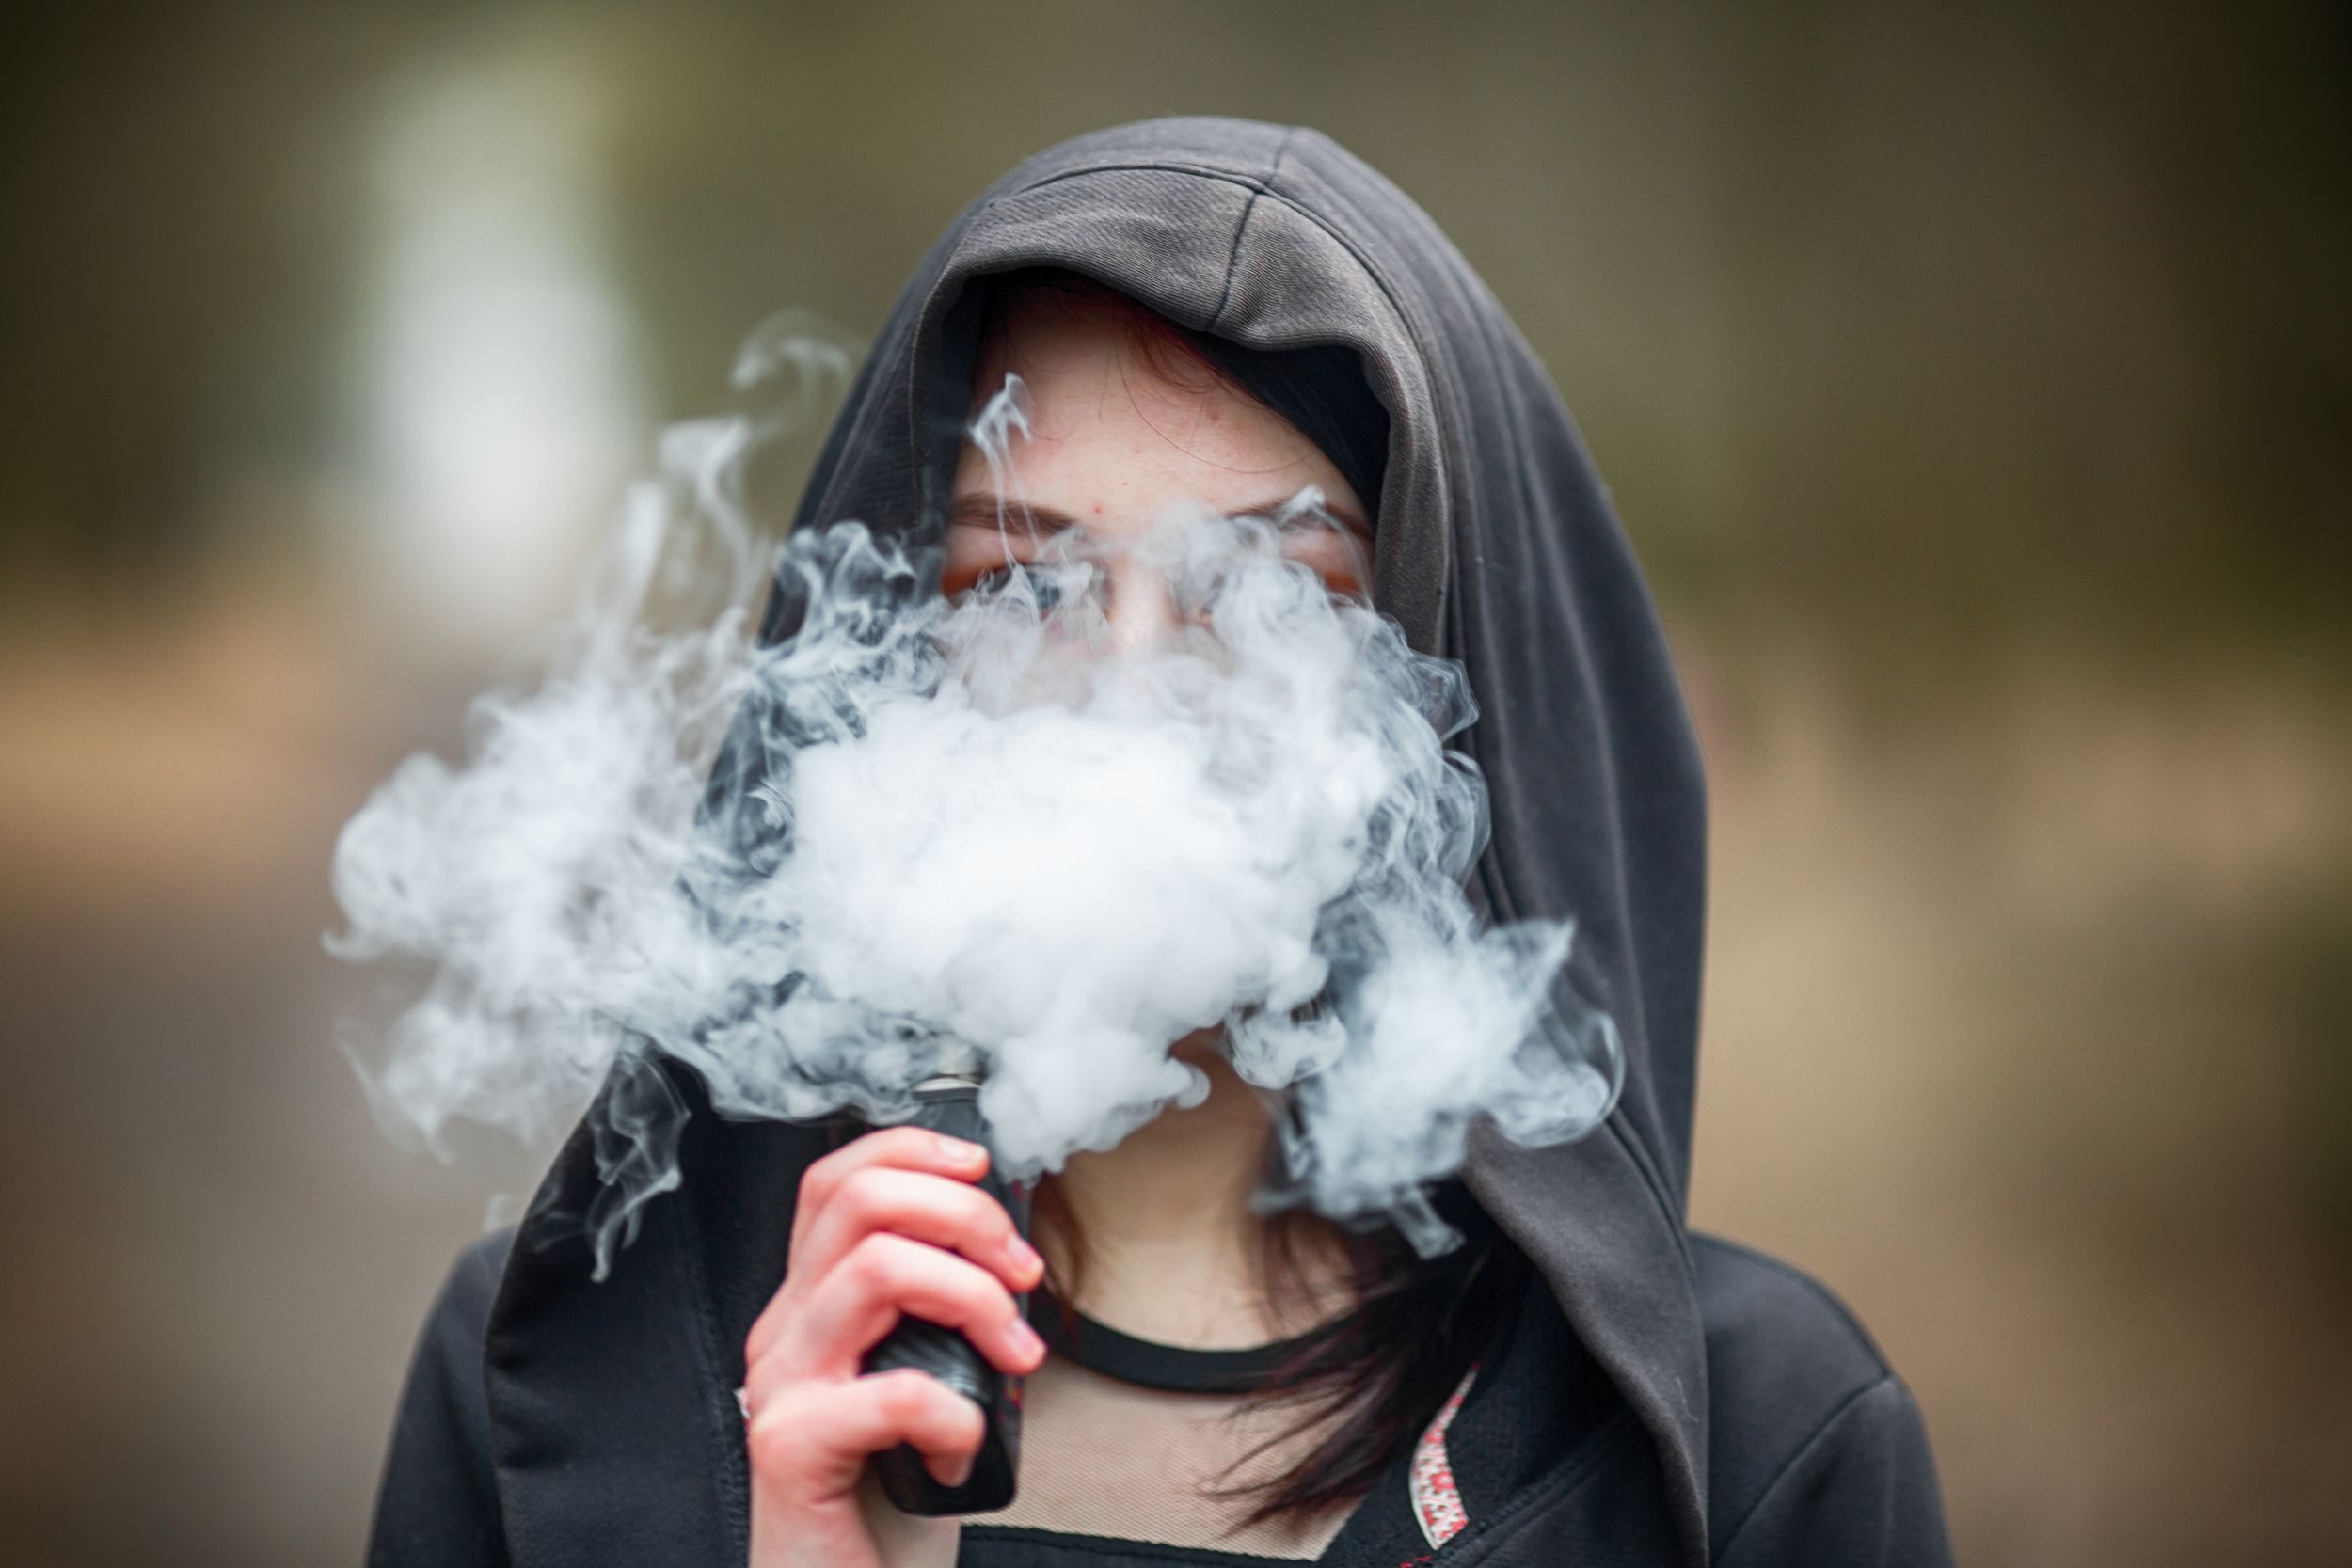


The effects of substance use on mental and physical health have been widely studied, and the results are often mixed and contradictory. The Centers for Disease Control and Prevention reports that in 2020, drug overdose deaths in the United States reached a record high of 96,779. Also, according to the National Institute of Alcohol Abuse and Alcoholism, in 2019, there were an estimated 95,000 alcohol-related deaths in the United States. Of course, not all cases of substance or alcohol abuse lead to such deadly levels, but they can also have negative consequences on both mental and physical health. Therefore, for our group, our goal is to examine the substance use on people’s both mental health and physical health, and how this in turn reflects labor output by doing regression analysis through Python. The motivation behind this research question is to gain a better understanding of the impact of substance use on an individual's overall health. The result of this regression may help to inform public health policies and interventions aiming at reducing the harm caused by substance use. Additionally, results will provide individuals with the information they need to make informed decisions about their substance use, and encourage them to seek help when needed. Ultimately, this empirical analysis is essential for improving the overall health and well-being of individuals and society as a whole.

# 2. Literature review

Research in the past has suggested a positive correlation between substance use and mental health problems. While the exact nature of the relationship is complex, it is clear that substance use can increase the risk of developing mental health problems. According to research published by JAMA Psychiatry, cannabis use during adolescence is associated with an increased risk of depression, anxiety, and suicidality in young adulthood (Gobbi et al., 2019). At the same time, per a research from the Lancet Psychiatry, alcohol use disorder is also correlated with increased risk of major depressive disorder (Castillo-Carniglia et al., 2019). In addition, veterans with substance use disorder are also more likely to develop mental health disorder (Vazan et al., 2013).

In addition to the mental health problems, the use of substances can cause similar troubles to the subject’s physical health conditions. In general, the most probable adverse effects of regular cannabis use include dependence syndrome, impaired respiratory function, and cardiovascular disease (Hall et al., 2014). Even the use of e-cigarettes, the most common cessation aid for traditional cigarettes and cannabis, is found to be independently associated with an increased risk of heart attack in adults, controlled for other risk factors (Bhatta et al., 2019). Further, per research published by the New England Journal of Medicine, addiction and substance use causes chronic diseases that affect the reward circuitry in the brain, leading to persistent drug-seeking behavior and impairments in decision-making and self-control (Volkow et al., 2016). Also, from a research published in Addiction, opioid use has physical health consequences, such as respiratory depression and infectious diseases (Degenhardt et al., 2014).

Indeed, substance use can cause both mental health and physical health. Further, when conducting regression, it is essential to ensure that the error term is not associated with the variable. Here researchers have identified that having health insurance can increase access to substance abuse treatment and mental health services, which can be beneficial in preventing drug use disorder. Specifically, from a research published by the Psychiatric Services, the Affordable Care Act was associated with increased insurance coverage, which increased the use of treatment services among adults with mental and substance use disorder (Saloner et al., 2017). Therefore, substance use causes mental health and physical health, which significantly impairs one’s ability to function as a normal and productive human being on a day-to-day basis.

# 3. Data selection and cleaning

#### Import packages

In [127]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

#### Import data

Our data is extracted from IPUMS National Health Interview Survey with 2010-2021 cross-secitons

In [128]:
# import data
data = pd.read_csv('nhis_00005.csv.gz')

In [129]:
# data cleaning

data1=data[['YEAR', 'AGE', 'SEX', 'EDUC', 'INCFAM07ON',
       'HEALTH', 'WLDAYR', 'DVINT', 'HOSPNGHT', 'HINOTCOVE', 'HINOTYRMO',
       'ALC5UPYR', 'ALCANYNO', 'ALCDAYSWK', 'ALCDAYSYR', 'ALC5UPNO', 'SMOKEV',
        'CIGSDAY', 'AHOPELESS', 'ANERVOUS', 'ARESTLESS', 'ASAD',
       'AWORTHLESS', 'MORTSTAT','INCIMPPOINT5']]

data1.rename(columns={'YEAR': 'year', 'NHISPID': 'ID','AGE':'age','SEX':'sex','EDUC':'educ','INCFAM07ON':'income',
                      'HEALTH':'health status','WLDAYR':'work loss days', 'DVINT':'med visit int', 'HOSPNGHT':'hosp', 
                      'HINOTCOVE':'insur status', 'ALC5UPYR':'days for 5+ drinks', 'ALCANYNO':'alcohol frequency in units',
                      'ALCDAYSWK':'alcohol days per week', 'ALCDAYSYR':'alcohol total days', 'ALC5UPNO':'days 5+ drink', 
                      'SMOKEV':'over 100 cigs', 'CIGSDAY':'cig per day','MORTSTAT':'mort','AHOPELESS':'hopeless','ANERVOUS':'nervous', 
                      'ARESTLESS':'restless', 'ASAD':'sadness','AWORTHLESS':'worthless','HINOTYRMO':'months w/o insur',
                      'INCIMPPOINT5':'income1'}, inplace=True)

#### Filtering data for meaningful entries

In [130]:

dat = data1.loc[(data1['age']<100) & 
      (data1['sex']<=2) & 
      (data1['educ']<996) & 
      (data1['educ']!=0) &
      (data1['income']<96) & 
      (data1['health status']<7) & 
      (data1['work loss days']<=365) & 
      (data1['med visit int']<997)&
      (data1['med visit int']!= 0) &
      (data1['hosp']<7) &
      (data1['hosp']!=0)&
      (data1['insur status']<7) &
      (data1['insur status']!=0) &
      (data1['days 5+ drink']<=365) &
      (data1['alcohol days per week']<=70) &
      (data1['alcohol total days']<=365) &
      (data1['over 100 cigs']<7) &
      (data1['over 100 cigs']!=0) &
      (data1['cig per day']<96) &
      (data1['mort']<=2) &
      (data1['hopeless']<6) &
      (data1['nervous']<6) &
      (data1['restless']<6) &
      (data1['sadness']<6) &
      (data1['worthless']<6)]

#### recoding categorical and dummy variables

In [131]:
# variable educ, education years
def educ(s):
    if s==102:
        return 0
    elif s==104:
        return 1
    elif s==105:
        return 2
    elif s==106:
        return 3
    elif s==107:
        return 4
    elif s==108:
        return 5
    elif s==109:
        return 6
    elif s==110:
        return 7
    elif s==111:
        return 8
    elif s==113:
        return 9
    elif s==114:
        return 10
    elif s==115:
        return 11
    elif s==116:
        return 12
    elif s==201:
        return 12
    elif s==202:
        return 12
    elif s==301:
        return 14
    elif s==302:
        return 14
    elif s==303:
        return 14
    elif s==400:
        return 16
    elif s==501:
        return 18
    elif s==502:
        return 23
    elif s==503:
        return 23
    
dat['educ']=dat['educ'].apply(educ)

# create qualitative categorical variables
def educ2(s):
    if s < 13:
        return 'high school'
    elif 15 > s > 12:
        return 'college'
    elif 24>s>14:
        return 'postgrad'
dat['educ2']=dat['educ'].apply(educ2)

In [132]:
# variable age
def age(s):
    if s<25:
        return 'Teen'
    elif s>=60:
        return 'Senior'
    elif 60>s>=25:
        return 'Mid-age'
    
dat['age2']=dat['age'].apply(age)

def ins(s):
     if s==1:
        return 0
     elif s==2:
        return 1

    
dat['insur status']=dat['insur status'].apply(ins)

#### Defining aggregate mental and physical health rating 

In [170]:
# take the average of five mental health related rating to calculate the general mental health status
dat['mental health']=(dat['hopeless']+dat['nervous']+dat['sadness']+dat['worthless']+dat['restless'])/5
# physical health rating variables
dat_physical=dat[['health status','hosp','med visit int','mort']]

In [134]:
# subset final dataframe with all filtered, created, and cleaned variables
dat=dat[['year', 'age', 'sex', 'educ', 'income', 'health status',
       'work loss days', 'hosp',
       'insur status', 'months w/o insur',
       'alcohol days per week', 'alcohol total days',
       'days 5+ drink', 'cig per day', 'hopeless', 'nervous',
       'restless', 'sadness', 'worthless', 'mort',
       'mental health','income1','med visit int','educ2','age2']]

# 4. Variables & Definition

- Explained variables: mental and general (physical) health status meansured by self-rating, labor production measured self-report absent work days duirng the previous year
- Explanatory variables: substance usage such as alcohol and tobacco meansured by frequency of intake in the previous year
- Demographics and controls: age, sex, education, personal income, and insurance status

In [135]:
dat.columns

Index(['year', 'age', 'sex', 'educ', 'income', 'health status',
       'work loss days', 'hosp', 'insur status', 'months w/o insur',
       'alcohol days per week', 'alcohol total days', 'days 5+ drink',
       'cig per day', 'hopeless', 'nervous', 'restless', 'sadness',
       'worthless', 'mort', 'mental health', 'income1', 'med visit int',
       'educ2', 'age2'],
      dtype='object')

In [136]:
var=pd.read_excel('variables def.xlsx')
pd.set_option('display.max_colwidth', 1000)
var

,Variables,Definition
0,educ,years of educations ranged from 0 to 23
1,educ2,categorical recoding of educ
2,income,Categorical range of income data
3,income1,numberical income
4,health status,"self-rating of general physical health, ranging from 1 as ""excellent"" to 5 as ""poor"""
5,work loss days,number of days abent for work
6,hosp,"hospitalization status in the past 12 months, 1 as not in hospital and 2 as is in a hospital overnight"
7,insur status,"insurance coverage status, 1 as insured 2 as not insured"
8,months w/o insur,number of months without insurance coverage in the past 12 months
9,alcohol days per week,frequency of alcohol intake per week in the past 12 months


#### Summary statistics

quantitative variables 

In [171]:
dat.describe().round(2)[['age','educ','health status','work loss days','cig per day','alcohol total days','mental health']]

,age,educ,health status,work loss days,cig per day,alcohol total days,mental health
count,23013.00,23013.00,23013.00,23013.00,23013.00,23013.00,23013.00
mean,40.39,13.24,2.33,4.72,11.16,89.55,0.54
std,12.98,2.37,0.95,18.55,8.48,108.38,0.71
min,18.00,0.00,1.00,0.00,1.00,1.00,0.00
25%,29.00,12.00,2.00,0.00,5.00,12.00,0.00
50%,39.00,14.00,2.00,0.00,10.00,52.00,0.20
75%,51.00,14.00,3.00,3.00,20.00,104.00,0.80
max,85.00,23.00,5.00,365.00,90.00,365.00,4.00


categorical variables

In [138]:
grouped = pd.crosstab(dat1.sex,dat1.insur_status)
prop_table=grouped/dat.shape[0]
prop_table = prop_table.reset_index(drop=False)
prop_table.columns.name = None
prop_table=prop_table.rename(columns={0:'insured',1:'uninsured'})
prop_table['sex']=['male','female']
prop_table['sum']=[0.385027+0.167854,0.343182+0.103937]
df2 = {'sex': 'sum', 'insured': 0.385027+0.343182, 'uninsured': 0.167854+0.103937, 'sum':1}
prop_table.append(df2, ignore_index = True).round(2)

,sex,insured,uninsured,sum
0,male,0.39,0.17,0.55
1,female,0.34,0.10,0.45
2,sum,0.73,0.27,1.00


# 5. Descriptive Plot

### General health and labor performance

- health status: rating of 1 the best health status to 5 the worst 

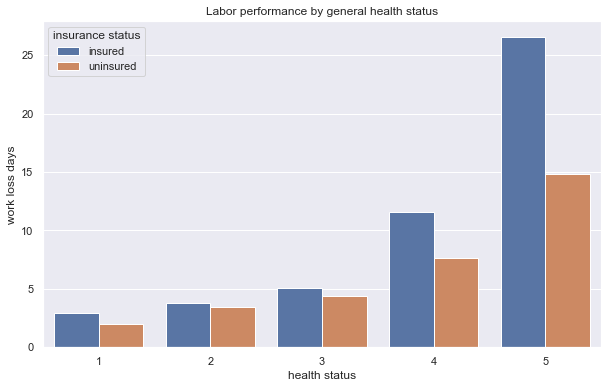

In [172]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='health status', y='work loss days', hue='insur status', ci=None);
plt.title("Labor performance by general health status");
plt.legend(title='insurance status', labels=['insured', 'uninsured']);

- interpretation: those who are healthier work for more days than their unhealthy counterpart; those who are insured tend to miss more work days than the uninsured counterpart, and the difference of work days loss increases as the general health status get worse, which demonstrates that health precondition affects labor performance differently based on insurance coverage status

### Mental health and labor performance

- mental health: larger value indicate worse mental health condition

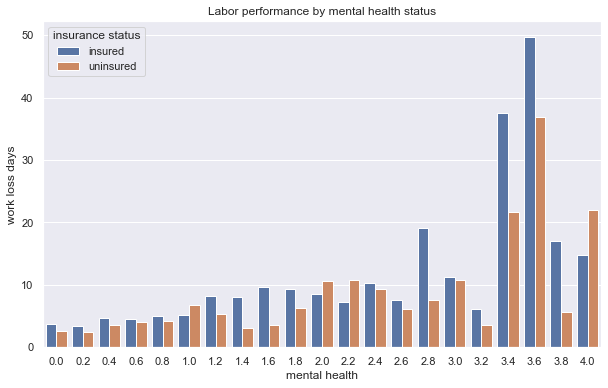

In [173]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='mental health', y='work loss days', hue='insur status', ci=None);
plt.title("Labor performance by mental health status");
plt.legend(title='insurance status', labels=['insured', 'uninsured']);

- Consistent with the general health status, mental heatlh also influences labor production (the healthier one with less work day absent)
- Clear difference between insurance coverage status on how people's decision in absent from work
- Insured people tend to miss more work days conditional on mental health status
- First implication for the research question: substance use would possibly directly cause worse health outcomes and indirectly lead to worse labor performance through health-related pathways

### General health, labor performance, and education

- mental health: larger value indicate worse mental health condition

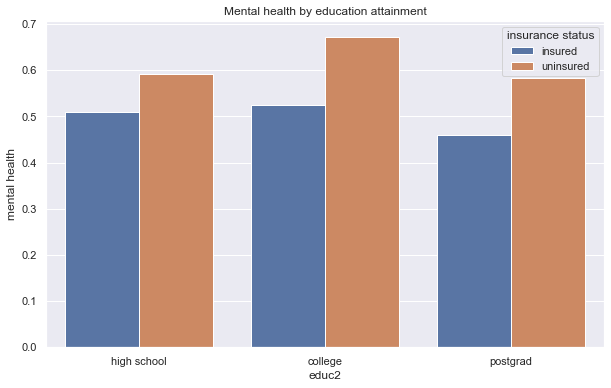

In [174]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='educ2', y='mental health', hue='insur status',order=['high school', 'college', 'postgrad'],ci=None);
plt.legend(title='insurance status', labels=['insured', 'uninsured']);
plt.title("Mental health by education attainment");

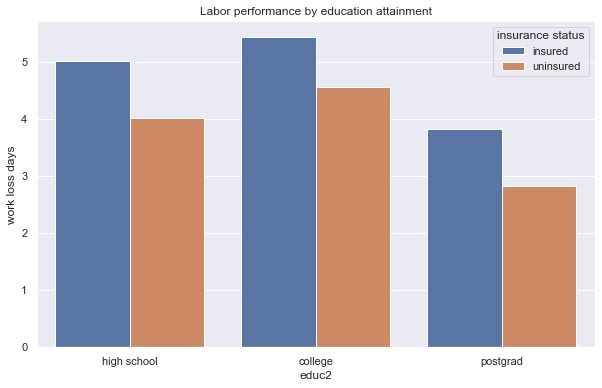

In [142]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='educ2', y='work loss days', hue='insur status',order=['high school', 'college', 'postgrad'],ci=None);
plt.title("Labor performance by education attainment");
plt.legend(title='insurance status', labels=['insured', 'uninsured']);

- More years of education associates with better mental health and less work day absense, but they are likely to be insignificant.
- Insurance coverage correlates with work day absense and mental health condition independent of education, which is likely to be more significan

### General health, labor performance, and income


- mental health: larger value indicate worse mental health condition

- Income group: larger number indicates higher income group

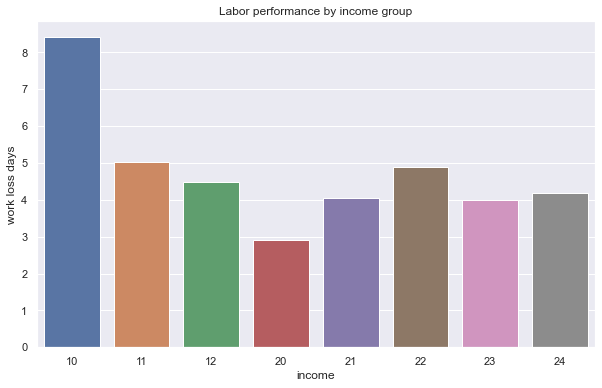

In [143]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='income', y='work loss days', ci=None);
plt.title("Labor performance by income group");

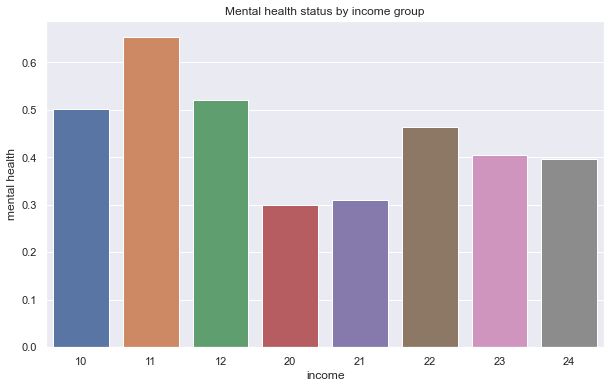

In [144]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='income', y='mental health',ci=None);
plt.title("Mental health status by income group");

- Groups in the middle of the income range tend to have both less absense from work and milder mental health issue

### General health, labor performance, and demographics

- mental health: larger value indicate worse mental health condition

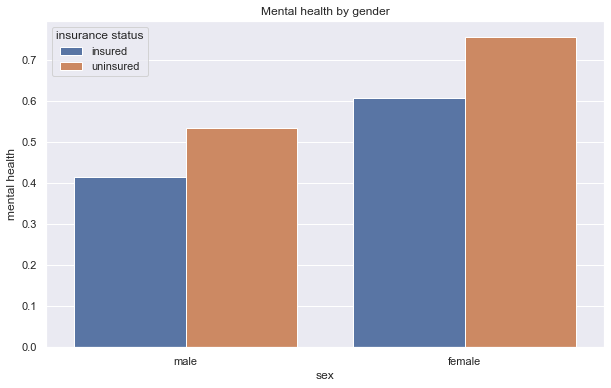

In [175]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='sex', y='mental health',hue='insur status',ci=None);
plt.legend(title='insurance status', labels=['insured', 'uninsured']);
plt.xticks(ticks=[0,1], labels=['male', 'female'])
plt.title("Mental health by gender");

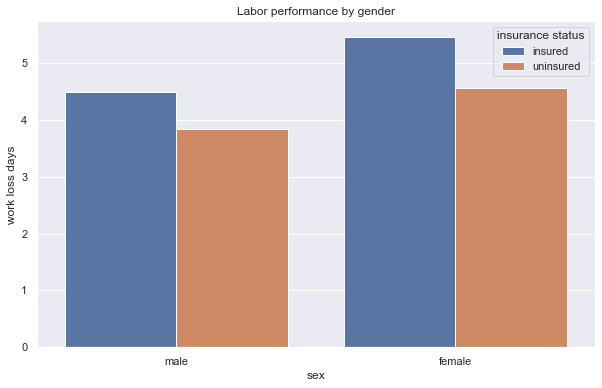

In [146]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='sex', y='work loss days',hue='insur status',ci=None);
plt.xticks(ticks=[0,1], labels=['male', 'female'])
plt.title("Labor performance by gender");
plt.legend(title='insurance status', labels=['insured', 'uninsured']);

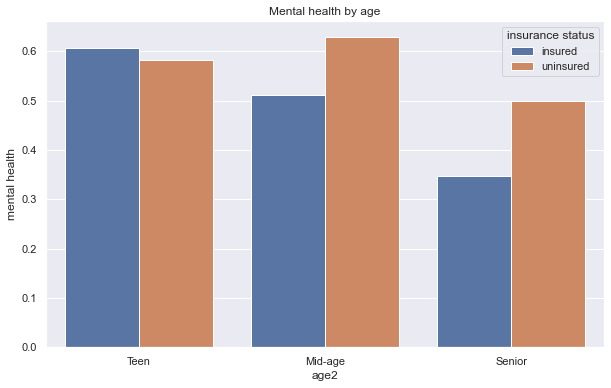

In [176]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(data=dat,x='age2', y='mental health',hue='insur status',order=['Teen', 'Mid-age', 'Senior'],ci=None);
plt.title("Mental health by age");
plt.legend(title='insurance status', labels=['insured', 'uninsured']);

- Second implication for the research question: insurance has an impact on how controls influence explained variables systematically.
- All the selected demographic and socioeconomic controls are correlated with insurance status when it comes to labor performance and mental health status.
- It is necessary to control for insurance status when running OLS based on these observations.


### General health and Substance usage

- mental health: larger value indicate worse mental health condition

In [148]:
# create categorical variable for cig per day
def cig(s):
    if 0<=s<=1:
        return 'less than 1 cig'
    elif 1<s<=5:
        return 'between 1 to 5 cigs'
    elif 5<s<20:
        return 'between 5 to 20 cigs'
    elif 20<=s:
        return 'more than 20 cigs'
    
dat['cig2']=dat['cig per day'].apply(cig)

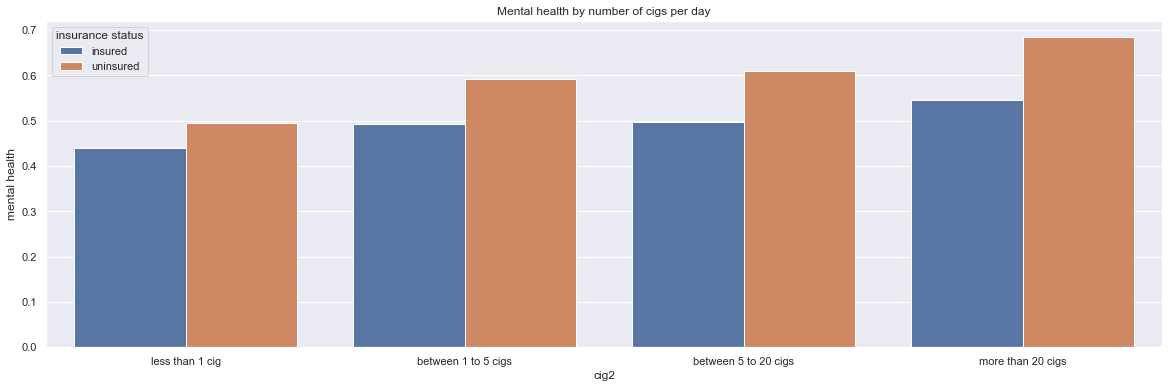

In [177]:
sns.set(rc={'figure.figsize':(20, 6)})
sns.barplot(data=dat,x='cig2', y='mental health', hue='insur status',order=['less than 1 cig', 'between 1 to 5 cigs', 'between 5 to 20 cigs', 'more than 20 cigs'],ci=None);
plt.legend(title='insurance status', labels=['insured', 'uninsured']);
plt.title("Mental health by number of cigs per day");

In [150]:
# create categorical variable for days 5+ drink
def alc(s):
    if 0<=s<=0:
        return 'no drinking'
    elif 10<s<=50:
        return 'between 10 to 50 days'
    elif 50<s<=100:
        return 'between 50 to 100 days'
    elif 100<s<=150:
        return 'between 100 to 150 days'
    elif 150<s:
        return 'more than 150 days'
    
dat['alc2']=dat['days 5+ drink'].apply(alc)

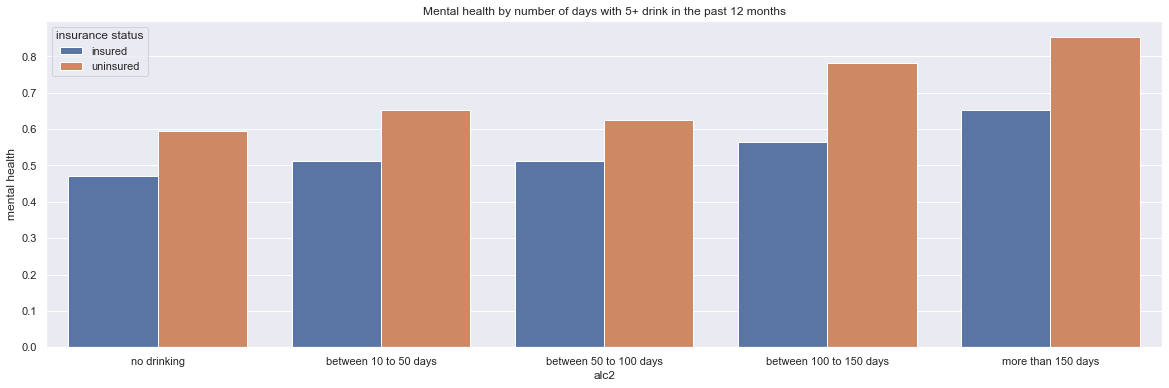

In [178]:
sns.set(rc={'figure.figsize':(20, 6)})
sns.barplot(data=dat,x='alc2', y='mental health',hue='insur status', ci=None);
plt.title("Mental health by number of days with 5+ drink in the past 12 months");
plt.legend(title='insurance status', labels=['insured', 'uninsured']);

- Third implication for the research question: insurance coverage status affect the correlation between explanatory variables and explained variables systematically.The insured population seems to endure less negative impact of substance consumption.
- Substance use, both alcohol and tobacco intake, correlates with severer mental healh issue

# 6. Empirical model & Methodology

### Hypothesis

1. Increase substance usage will exacerbate mental distress in terms of increasing mental health rating
2. Increase substance usage will worsen labor performance in terms of increasing  work days loss
3. The uninsured population will be affected more by substance usage in terms of labor performance and mental distress compared to the insured counterparts.

### OLS Regression modelling 

1. Run regression by including insurance in the model:



$$ Health = \beta_0 + \beta_1*Tobacco + \beta_2*Alcohol + \beta_3*Age + \beta_4*Sex + \beta_5*Education + \beta_6*Income + \beta_7*Insurance$$

$$ Labor Performance = \beta_0 + \beta_1*Tobacco + \beta_2*Alcohol + \beta_3*Age + \beta_4*Sex + \beta_5*Education + \beta_6*Income + \beta_7*Insurance$$

2. Run regression based on the insured population and uninsured population respectively by the model:

$$ Health = \beta_0 + \beta_1*Tobacco + \beta_2*Alcohol + \beta_3*Age + \beta_4*Sex + \beta_5*Education + \beta_6*Income$$

$$ Labor Performance = \beta_0 + \beta_1*Tobacco + \beta_2*Alcohol + \beta_3*Age + \beta_4*Sex + \beta_5*Education + \beta_6*Income$$

- The first regression includes substance use and all the controls, including insurance
- The second regression excludes the insuracne and will be carried out based on different population grouped by insurance status.In other word, the insurance status works as a mediating variable outside the regression when evaluating the effect of substance use on mental health.This regression is used to test the differentiated effect of substance usage on mental health and labor performance grouped by insurance status

# 7.Results

In [152]:
# rename columns to eliminate spaces in variables
dat1 = dat.rename(columns={'mental health': 'mental_health',
                        'work loss days': 'work_days_loss',
                        'cig per day': 'cig_per_day',
                         'days 5+ drink':'days_drink',
                         'insur status':'insur_status'})
dat1.columns

Index(['year', 'age', 'sex', 'educ', 'income', 'health status',
       'work_days_loss', 'hosp', 'insur_status', 'months w/o insur',
       'alcohol days per week', 'alcohol total days', 'days_drink',
       'cig_per_day', 'hopeless', 'nervous', 'restless', 'sadness',
       'worthless', 'mort', 'mental_health', 'income1', 'med visit int',
       'educ2', 'age2', 'cig2', 'alc2'],
      dtype='object')

### First regression

In [179]:
m1 = smf.ols(formula = 'mental_health ~ cig_per_day +  days_drink + age + sex + educ + income + insur_status', data=dat1).fit()
m2 = smf.ols(formula = 'work_days_loss ~ cig_per_day + days_drink + age + sex + educ + income + insur_status', data=dat1).fit()
st=Stargazer([m1, m2])
from IPython.core.display import HTML
st.custom_columns(['DV:mental health','DV:work day loss'],[1,1])
HTML(st.render_html())

### Interpretation of results:

1.	Mental distress is positively correlated with cigarettes per day and days of 5+ drinks. With each additional cigarette per day, the mental health distress index increases by 0.006. With each additional day of 5+ alcohol usage, the mental health distress index increases by 0.001. Both estimates are statistically significant at a 5% significance level. 

2. Days of absence are positively correlated with cigarettes per day and days of 5+ drinks. With each additional cigarette per day, the mental health distress index increases by 0.037. The effect is statistically significant at a 5% significance level. With each additional day of 5+ alcohol usage, the mental health distress index increases by 0.002. The effect is not statistically significant.  

### Second regression (differentiated effect between insurance group)

In [154]:
m3 = smf.ols(formula = 'mental_health ~ cig_per_day + days_drink + age + sex + educ + income', data=dat1[dat1['insur_status']==0]).fit()
m4 = smf.ols(formula = 'mental_health ~ cig_per_day + days_drink + age + sex + educ + income', data=dat1[dat1['insur_status']==1]).fit()
m5 = smf.ols(formula = 'work_days_loss ~ cig_per_day + days_drink + age + sex + educ + income', data=dat1[dat1['insur_status']==0]).fit()
m6 = smf.ols(formula = 'work_days_loss ~ cig_per_day + days_drink + age + sex + educ + income', data=dat1[dat1['insur_status']==1]).fit()
st=Stargazer([m3, m4, m5, m6])
from IPython.core.display import HTML
st.custom_columns(['DV:mental health; insured','DV:mental health; uninsured','DV:work day loss; insured','DV:work day loss; uninsured'],[1,1,1,1])
HTML(st.render_html())

### Interpretation of results:

1. For the insured population, mental distress is positively correlated with cigarettes per day and days of 5+ units drinks. With each additional cigarette per day, the mental health distress index increases by 0.005. With each additional day of 5+ units alcohol usage, the mental health distress index increases by 0.001. Both estimates are statistically significant at a 5% significance level.

2. For the uninsured population, mental distress is positively correlated with cigarettes per day and days of 5+ drinks. With each additional cigarette per day, the mental health distress index increases by 0.006. With each additional day of 5+ alcohol usage, the mental health distress index increases by 0.001. Both estimates are statistically significant at a 5% significance level.

3. Days of absence are positively correlated with cigarettes per day and days of 5+ drinks. With each additional cigarette per day, loss of work days increases by 0.014 for the insured population. With each additional day of 5+ alcohol usage, the loss of work days decreases by 0.001. However, neither of the effects are statistically significant. 

4. For the uninsured population, days of absence are positively correlated with cigarettes per day and days of 5+ drinks. With each additional cigarette per day, the mental health distress index increases by 0.086. The effect is statistically significant at a 5% significance level. With each additional day of 5+ alcohol usage, the loss of work days increases by 0.005. The effect is not statistically significant at the 5% level. 

5. For both dependent variables, the estimates of effect tend to be larger in the uninsured population  regardless of the statistical significance, so this implies that the negative effect of additional cigarettes per day and days of 5+ drinks tend to be slightly stronger for the uninsured population compared to the insured population. 

### Test for robustness and assumpion

In [155]:
# F-test
hypotheses = ['cig_per_day = 0', 'days_drink = 0']

ftest = m3.f_test(hypotheses)
fstats_m3 = ftest.statistic
fpval_m3 = ftest.pvalue
print(f'fstat_m3: {fstats_m3}\n')
print(f'fpval_m3: {fpval_m3}\n')

ftest = m4.f_test(hypotheses)
fstats = ftest.statistic
fpval = ftest.pvalue
print(f'fstat_m4: {fstats}\n')
print(f'fpval_m4: {fpval}\n')

ftest = m5.f_test(hypotheses)
fstats = ftest.statistic
fpval = ftest.pvalue
print(f'fstat_m5: {fstats}\n')
print(f'fpval_m5: {fpval}\n')

ftest = m6.f_test(hypotheses)
fstats = ftest.statistic
fpval = ftest.pvalue
print(f'fstat_m6: {fstats}\n')
print(f'fpval_m6: {fpval}\n')

fstat_m3: 54.18045935592964

fpval_m3: 3.511576151571699e-24

fstat_m4: 32.24661398063558

fpval_m4: 1.1675358724401983e-14

fstat_m5: 0.30464925513555163

fpval_m5: 0.7373860472079696

fstat_m6: 6.907178009682056

fpval_m6: 0.001008236890147586



- except model 5, which has a fpval of 0.7373, the rest of them all have a fpval less than 0.05. Therefore, the variables 'cigs per day' and 'number of days with 5+ units drinking' are jointly significant.

In [156]:
# residuals
sum_u=np.sum(m1.resid)
avg_u=np.mean(m1.resid)
print(f'avg_u of m1: {round(avg_u)}\n')
print(f'sum_u of m1: {round(sum_u)}\n')
sum_u=np.sum(m3.resid)
avg_u=np.mean(m3.resid)
print(f'avg_u of m3: {round(avg_u)}\n')
print(f'sum_u of m3: {round(sum_u)}\n')

avg_u of m1: 0

sum_u of m1: 0

avg_u of m3: 0

sum_u of m3: 0



- The sum of residuals and the average of residuals are zero

In [157]:
# Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=dat1[['cig_per_day','days_drink','insur_status']].copy()
X['intercept']=1
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,variables,VIF
0,cig_per_day,1.010997
1,days_drink,1.010757
2,insur_status,1.002336
3,intercept,3.075683


- Since the variance inflation factor are all smaller than 10, it is plausible that there is no multicolinearity between cigs per day, number of days with 5+ drinking, and insurance status

# 8.Conclusion

In conclusion, the results generally support our hypothesis that more frequent substance usage like alcohol and tobacco increases mental distress.The first regression model have shown that there are significant effect of both tobacco and alcohol intake on mental health. As the explanatory variables of interest measure the frequency of tobacco and alcohol intake, where the tobacco is measured on daily frequency and alcohol is measure by 12 months period, the regression results imply that increase in frequency of these substances usage would increase mental distress. When it comes to labor performance, a more frequency tobacco intake does have a significant impact on the labor production, where there is a significant increase in the working day absense. However, we do not observe a significant increase in work day absent due to increase in alcohol consumption as we used to hypothesize. 

In the second regression model, where we try to estimate the differentiated effect grouped by insurance coverage status, the insured group does endure a milder increase in mental distress compared to the uninsured group, but the differences are small. What's more, the insured group also experience less increase in work day loss compared to the uninsured group. Nontheless, there is no significant increase in work day loss due to increase in frequency of substance usage of either alcohol or tobacco in both insured and uninsured group, except that in the uninsured group increase in cigs per day does result in more work day loss significantly at 5% significance level. Therefore, it is arguable that the effect of substance usage on work days absense remains inconclusive.

Admittedly, the main shortcoming of this study is that the explanatory variables of interets, including cigs per day and alcohol consumption, are not randomly assigned due to the fact that the data is extracted from a cross-sectional survey, we are not able to capture all the unobserved factors that may be correlated with the variables of interest and the potential outcomes. It is likely that with OLS regression we are unable to capture the unbiased estimators because the conditional mean independence assumption is unlikely to hold. A better methodological design and data structure, like difference-in-difference with panel data may be more effective in identifying the more accurate treatment effect by reducing selection bias. The possible direction for future study could be to estimate the effect of substance usage on the labor performance in a more concrerte way, as we do not come up with a conclusive results with our data and methodology.

# Reference

1. Gobbi, G., Atkin, T., Zytynski, T., Wang, S., Askari, S., Boruff, J., Ware, M., Marmorstein, N., Cipriani, A., Dendukuri, N., & Mayo, N. (2019). Association of Cannabis Use in Adolescence and Risk of Depression, Anxiety, and Suicidality in Young Adulthood: A Systematic Review and Meta-analysis. JAMA psychiatry, 76(4), 426–434. https://doi.org/10.1001/jamapsychiatry.2018.4500 

2. Castillo-Carniglia, A., Keyes, K. M., Hasin, D. S., & Cerdá, M. (2019). Psychiatric comorbidities in alcohol use disorder. The lancet. Psychiatry, 6(12), 1068–1080. https://doi.org/10.1016/S2215-0366(19)30222-6 

3. Vazan, P., Golub, A., & Bennett, A. S. (2013). Substance use and other mental health disorders among veterans returning to the inner city: prevalence, correlates, and rates of unmet treatment need. Substance use & misuse, 48(10), 880–893. https://doi.org/10.3109/10826084.2013.796989 

4. Saloner, B., Bandara, S., Bachhuber, M., & Barry, C. L. (2017). Insurance coverage and treatment use under the Affordable Care Act among adults with mental and substance use disorders. Psychiatric Services, 68(6), 542–548. https://doi.org/10.1176/appi.ps.201600182 

5. Hall, W.D., & Degenhardt, L. (2014). The adverse health effects of chronic cannabis use. Drug testing and analysis, 6 1-2, 39-45 . 

6. Bhatta, Dharma & Glantz, Stanton. (2019). Electronic Cigarette Use and Myocardial Infarction Among Adults in the US Population Assessment of Tobacco and Health. Journal of the American Heart Association. 8. 10.1161/JAHA.119.012317. 

7. Degenhardt, L., Charlson, F., Mathers, B., Hall, W. D., Flaxman, A. D., Johns, N., & Vos, T. (2014). The Global Epidemiology and burden of opioid dependence: Results from the global burden of disease 2010 study. Addiction, 109(8), 1320-1333. doi:10.1111/add.12551

8. Volkow, N. D., Koob, G. F., & McLellan, A. T. (2016). Neurobiologic advances from the brain disease model of addiction. New England Journal of Medicine, 374(4), 363-371. doi:10.1056/nejmra1511480

In [1]:
!jupyter nbconvert --to html 320LAB_Final.ipynb

[NbConvertApp] Converting notebook 320LAB_Final.ipynb to html
[NbConvertApp] Writing 1474831 bytes to 320LAB_Final.html
